In [327]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [6]:
fitness_df = pd.read_csv("random_fitness_dataset.csv")
fitness_df.head(10)

,record_id,timestamp,user_id,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,steps,sleep_hours,weight_kg
0,1,2025-07-22 09:22:54,U026,67,Male,Cycling,7,322,175,3591,7.0,84.3
1,2,2025-05-28 13:53:54,U039,16,Female,Strength Training,83,265,113,22312,5.7,79.6
2,3,2025-08-07 01:36:54,U046,62,Female,Cycling,118,508,98,5418,6.6,88.3
3,4,2025-07-17 01:56:54,U048,56,Female,Swimming,75,270,150,19809,7.9,69.0
4,5,2025-08-11 03:22:54,U042,42,Other,Yoga,76,308,141,12562,5.0,61.6
5,6,2025-07-25 13:00:54,U005,39,Female,HIIT,50,471,163,23432,7.4,98.7
6,7,2025-05-21 08:47:54,U030,61,Other,Walking,88,238,78,14851,6.8,61.8
7,8,2025-06-28 14:29:54,U014,46,Female,Yoga,39,133,179,15351,4.5,46.0
8,9,2025-08-02 19:57:54,U036,63,Male,Swimming,10,500,82,13072,4.7,72.6
9,10,2025-08-31 09:54:54,U019,27,Other,Swimming,100,210,165,22439,6.3,73.7


In [5]:
fitness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_id        200 non-null    int64  
 1   timestamp        200 non-null    object 
 2   user_id          200 non-null    object 
 3   age              200 non-null    int64  
 4   gender           200 non-null    object 
 5   activity_type    200 non-null    object 
 6   duration_min     200 non-null    int64  
 7   calories_burned  200 non-null    int64  
 8   heart_rate_avg   200 non-null    int64  
 9   steps            200 non-null    int64  
 10  sleep_hours      200 non-null    float64
 11  weight_kg        200 non-null    float64
dtypes: float64(2), int64(6), object(4)
memory usage: 18.9+ KB


In [6]:
fitness_df.describe()

,record_id,age,duration_min,calories_burned,heart_rate_avg,steps,sleep_hours,weight_kg
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,100.500000,44.380000,64.025000,295.765000,120.935000,14020.82000,6.313000,70.152000
std,57.879185,15.417982,34.693987,120.563834,34.100366,6428.05981,1.911518,14.129562
min,1.000000,16.000000,5.000000,50.000000,60.000000,370.00000,3.000000,35.300000
25%,50.750000,33.000000,33.000000,220.000000,89.750000,9585.00000,4.775000,61.450000
50%,100.500000,43.000000,68.000000,311.500000,121.000000,14857.00000,6.500000,70.600000
75%,150.250000,58.000000,95.000000,378.000000,150.250000,19007.75000,7.900000,80.100000
max,200.000000,69.000000,119.000000,585.000000,179.000000,24984.00000,9.500000,105.200000


In [7]:
fitness_df.isna().values.any() # check if there are any null values

np.False_

In [8]:
fitness_df.isnull().sum() # count the number of null values

record_id          0
timestamp          0
user_id            0
age                0
gender             0
activity_type      0
duration_min       0
calories_burned    0
heart_rate_avg     0
steps              0
sleep_hours        0
weight_kg          0
dtype: int64

In [9]:
"""
Data Transformation
   Date Transformation into:
   Date, Month, day, hour
"""
fitness_df['time_stamp'] = pd.to_datetime(fitness_df['timestamp'])
fitness_df['time_stamp'].head()

0   2025-07-22 09:22:54
1   2025-05-28 13:53:54
2   2025-08-07 01:36:54
3   2025-07-17 01:56:54
4   2025-08-11 03:22:54
Name: time_stamp, dtype: datetime64[ns]

In [10]:
# Get the date
fitness_df['date'] = fitness_df['time_stamp'].dt.date
fitness_df.head()

,record_id,timestamp,user_id,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,steps,sleep_hours,weight_kg,time_stamp,date
0,1,2025-07-22 09:22:54,U026,67,Male,Cycling,7,322,175,3591,7.0,84.3,2025-07-22 09:22:54,2025-07-22
1,2,2025-05-28 13:53:54,U039,16,Female,Strength Training,83,265,113,22312,5.7,79.6,2025-05-28 13:53:54,2025-05-28
2,3,2025-08-07 01:36:54,U046,62,Female,Cycling,118,508,98,5418,6.6,88.3,2025-08-07 01:36:54,2025-08-07
3,4,2025-07-17 01:56:54,U048,56,Female,Swimming,75,270,150,19809,7.9,69.0,2025-07-17 01:56:54,2025-07-17
4,5,2025-08-11 03:22:54,U042,42,Other,Yoga,76,308,141,12562,5.0,61.6,2025-08-11 03:22:54,2025-08-11


In [11]:
# Extracting the month name
fitness_df['month']  = fitness_df['time_stamp'].dt.month_name()
fitness_df.head()

,record_id,timestamp,user_id,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,steps,sleep_hours,weight_kg,time_stamp,date,month
0,1,2025-07-22 09:22:54,U026,67,Male,Cycling,7,322,175,3591,7.0,84.3,2025-07-22 09:22:54,2025-07-22,July
1,2,2025-05-28 13:53:54,U039,16,Female,Strength Training,83,265,113,22312,5.7,79.6,2025-05-28 13:53:54,2025-05-28,May
2,3,2025-08-07 01:36:54,U046,62,Female,Cycling,118,508,98,5418,6.6,88.3,2025-08-07 01:36:54,2025-08-07,August
3,4,2025-07-17 01:56:54,U048,56,Female,Swimming,75,270,150,19809,7.9,69.0,2025-07-17 01:56:54,2025-07-17,July
4,5,2025-08-11 03:22:54,U042,42,Other,Yoga,76,308,141,12562,5.0,61.6,2025-08-11 03:22:54,2025-08-11,August


In [12]:
#Extracting day
fitness_df['day'] = fitness_df['time_stamp'].dt.day_name()
fitness_df.head()

,record_id,timestamp,user_id,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,steps,sleep_hours,weight_kg,time_stamp,date,month,day
0,1,2025-07-22 09:22:54,U026,67,Male,Cycling,7,322,175,3591,7.0,84.3,2025-07-22 09:22:54,2025-07-22,July,Tuesday
1,2,2025-05-28 13:53:54,U039,16,Female,Strength Training,83,265,113,22312,5.7,79.6,2025-05-28 13:53:54,2025-05-28,May,Wednesday
2,3,2025-08-07 01:36:54,U046,62,Female,Cycling,118,508,98,5418,6.6,88.3,2025-08-07 01:36:54,2025-08-07,August,Thursday
3,4,2025-07-17 01:56:54,U048,56,Female,Swimming,75,270,150,19809,7.9,69.0,2025-07-17 01:56:54,2025-07-17,July,Thursday
4,5,2025-08-11 03:22:54,U042,42,Other,Yoga,76,308,141,12562,5.0,61.6,2025-08-11 03:22:54,2025-08-11,August,Monday


In [13]:
# Extract Hour of the day
fitness_df['hour'] = fitness_df['time_stamp'].dt.hour
fitness_df.head()

,record_id,timestamp,user_id,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,steps,sleep_hours,weight_kg,time_stamp,date,month,day,hour
0,1,2025-07-22 09:22:54,U026,67,Male,Cycling,7,322,175,3591,7.0,84.3,2025-07-22 09:22:54,2025-07-22,July,Tuesday,9
1,2,2025-05-28 13:53:54,U039,16,Female,Strength Training,83,265,113,22312,5.7,79.6,2025-05-28 13:53:54,2025-05-28,May,Wednesday,13
2,3,2025-08-07 01:36:54,U046,62,Female,Cycling,118,508,98,5418,6.6,88.3,2025-08-07 01:36:54,2025-08-07,August,Thursday,1
3,4,2025-07-17 01:56:54,U048,56,Female,Swimming,75,270,150,19809,7.9,69.0,2025-07-17 01:56:54,2025-07-17,July,Thursday,1
4,5,2025-08-11 03:22:54,U042,42,Other,Yoga,76,308,141,12562,5.0,61.6,2025-08-11 03:22:54,2025-08-11,August,Monday,3


In [15]:
fitness_df.describe()

,record_id,age,duration_min,calories_burned,heart_rate_avg,steps,sleep_hours,weight_kg,time_stamp,hour
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200,200.00000
mean,100.500000,44.380000,64.025000,295.765000,120.935000,14020.82000,6.313000,70.152000,2025-07-23 09:56:07.200000,11.08500
min,1.000000,16.000000,5.000000,50.000000,60.000000,370.00000,3.000000,35.300000,2025-04-24 14:20:54,0.00000
25%,50.750000,33.000000,33.000000,220.000000,89.750000,9585.00000,4.775000,61.450000,2025-06-07 09:19:54,5.00000
50%,100.500000,43.000000,68.000000,311.500000,121.000000,14857.00000,6.500000,70.600000,2025-07-24 19:38:24,11.00000
75%,150.250000,58.000000,95.000000,378.000000,150.250000,19007.75000,7.900000,80.100000,2025-09-02 16:14:09,17.00000
max,200.000000,69.000000,119.000000,585.000000,179.000000,24984.00000,9.500000,105.200000,2025-10-16 12:55:54,23.00000
std,57.879185,15.417982,34.693987,120.563834,34.100366,6428.05981,1.911518,14.129562,NaN,7.02671


In [16]:
# understanding how each activity burn thr callories
fitness_df.groupby('activity_type')['calories_burned'].mean().sort_values(ascending = False)

activity_type
HIIT                 320.629630
Yoga                 318.523810
Walking              304.033333
Running              302.833333
Swimming             286.925926
Strength Training    267.444444
Cycling              250.478261
Name: calories_burned, dtype: float64

In [17]:
# Which day of the week has more people training
fitness_df.groupby('day')['user_id'].count().sort_values(ascending = False)

day
Thursday     34
Friday       32
Saturday     30
Tuesday      28
Wednesday    28
Monday       26
Sunday       22
Name: user_id, dtype: int64

In [20]:
# Which month did people train the most
fitness_df.groupby('month')['user_id'].count().sort_values(ascending = False)

month
August       43
June         37
July         29
May          28
September    27
October      25
April        11
Name: user_id, dtype: int64

In [22]:
def seasons(x):
    if x == 'December' or x == 'January' or x == 'February':
        return 'Winter'
    elif x == 'September' or x == 'October' or x== 'November':
        return 'Autumn'
    elif x == 'June' or x == 'July' or x == 'August':  
        return 'Summer'
    elif x == 'March' or x == 'April' or x == 'May':
        return 'Spring'

        
fitness_df['season'] = fitness_df['month'].apply(seasons)

In [23]:
fitness_df.head()

,record_id,timestamp,user_id,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,steps,sleep_hours,weight_kg,time_stamp,date,month,day,hour,season
0,1,2025-07-22 09:22:54,U026,67,Male,Cycling,7,322,175,3591,7.0,84.3,2025-07-22 09:22:54,2025-07-22,July,Tuesday,9,Summer
1,2,2025-05-28 13:53:54,U039,16,Female,Strength Training,83,265,113,22312,5.7,79.6,2025-05-28 13:53:54,2025-05-28,May,Wednesday,13,Spring
2,3,2025-08-07 01:36:54,U046,62,Female,Cycling,118,508,98,5418,6.6,88.3,2025-08-07 01:36:54,2025-08-07,August,Thursday,1,Summer
3,4,2025-07-17 01:56:54,U048,56,Female,Swimming,75,270,150,19809,7.9,69.0,2025-07-17 01:56:54,2025-07-17,July,Thursday,1,Summer
4,5,2025-08-11 03:22:54,U042,42,Other,Yoga,76,308,141,12562,5.0,61.6,2025-08-11 03:22:54,2025-08-11,August,Monday,3,Summer


In [24]:
fitness_df.groupby('season')['user_id'].count().sort_values(ascending = 0)

season
Summer    109
Autumn     52
Spring     39
Name: user_id, dtype: int64

In [25]:
def week_time(day):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']:
        return 'weekday'
    elif day in ['Saturday', 'Sunday']:
        return 'weekend'
    else:
        return 'NULL'

fitness_df['week_time'] = fitness_df['day'].apply(week_time)        

In [26]:
fitness_df.head()

,record_id,timestamp,user_id,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,steps,sleep_hours,weight_kg,time_stamp,date,month,day,hour,season,week_time
0,1,2025-07-22 09:22:54,U026,67,Male,Cycling,7,322,175,3591,7.0,84.3,2025-07-22 09:22:54,2025-07-22,July,Tuesday,9,Summer,weekday
1,2,2025-05-28 13:53:54,U039,16,Female,Strength Training,83,265,113,22312,5.7,79.6,2025-05-28 13:53:54,2025-05-28,May,Wednesday,13,Spring,weekday
2,3,2025-08-07 01:36:54,U046,62,Female,Cycling,118,508,98,5418,6.6,88.3,2025-08-07 01:36:54,2025-08-07,August,Thursday,1,Summer,weekday
3,4,2025-07-17 01:56:54,U048,56,Female,Swimming,75,270,150,19809,7.9,69.0,2025-07-17 01:56:54,2025-07-17,July,Thursday,1,Summer,weekday
4,5,2025-08-11 03:22:54,U042,42,Other,Yoga,76,308,141,12562,5.0,61.6,2025-08-11 03:22:54,2025-08-11,August,Monday,3,Summer,weekday


In [27]:
# Generating a simple summary
fitness_df.groupby(['week_time']).agg({
'steps' : ['count','mean'],
'steps' : ['max', 'mean', 'min'],
'calories_burned' : ['max', 'mean', 'min']
})

steps                     calories_burned                
             max          mean   min             max        mean min
week_time                                                           
weekday    24984  13494.689189   370             585  304.081081  50
weekend    24095  15518.269231  3126             504  272.096154  50

In [28]:
# Generating a simple summary
fitness_df.groupby(['season']).agg({
'steps' : ['count','mean'],
'steps' : ['max', 'mean', 'min'],
'calories_burned' : ['max', 'mean', 'min']
})

steps                     calories_burned                
          max          mean   min             max        mean min
season                                                           
Autumn  24409  13714.038462   633             563  305.538462  50
Spring  24789  14270.076923  1354             443  258.179487  50
Summer  24984  14077.990826   370             585  304.550459  50

In [29]:
# Generating a simple summary
fitness_df.groupby('month').agg({
'steps' : ['count','mean'],
'steps' : ['max', 'mean', 'min'],
'calories_burned' : ['max', 'mean', 'min']
}).reset_index()

month  steps                     calories_burned                 
                max          mean   min             max        mean  min
0      April  23062  12322.727273  1354             443  220.636364   50
1     August  24819  14526.930233  1803             552  297.534884   50
2       July  24435  14312.137931  1267             567  299.827586  108
3       June  24984  13372.729730   370             585  316.405405   50
4        May  24789  15035.107143  4079             435  272.928571   50
5    October  24409  12946.600000   633             563  325.880000   50
6  September  23482  14424.629630  1872             476  286.703704   50

In [30]:
# Generating a simple summary
fitness_df.groupby(['day']).agg({
'steps' : ['count','mean'],
'steps' : ['max', 'mean', 'min'],
'calories_burned' : ['max', 'mean', 'min']
}).reset_index()

day  steps                      calories_burned                 
                max          mean    min             max        mean  min
0     Friday  24968  13519.093750    370             502  321.812500   50
1     Monday  24984  14419.153846    960             545  318.346154   50
2   Saturday  24095  14515.566667   3126             504  271.400000   50
3     Sunday  23838  16885.590909  10048             468  273.045455  124
4   Thursday  24789  11397.382353    633             585  322.264706   50
5    Tuesday  24819  14785.107143   1872             552  258.250000   50
6  Wednesday  22336  13864.678571   3411             567  294.321429   50

In [31]:
# Generating a simple summary
fitness_df.groupby(['gender']).agg({
'steps' : ['count','mean'],
'steps' : ['max', 'mean', 'min'],
'calories_burned' : ['max', 'mean', 'min']
}).reset_index()

gender  steps                    calories_burned                
             max          mean  min             max        mean min
0  Female  24789  13724.144928  721             563  296.623188  50
1    Male  24968  13594.507937  370             545  298.095238  50
2   Other  24984  14716.823529  633             585  292.735294  50

In [32]:
# Generating a simple summary
fitness_df.groupby(['activity_type']).agg({
'steps' : ['count','mean'],
'steps' : ['max', 'mean', 'min'],
'calories_burned' : ['max', 'mean', 'min']
}).sort_values(by = 'activity_type', ascending = 0)

steps                     calories_burned                
                     max          mean   min             max        mean min
activity_type                                                               
Yoga               24789  13197.642857   370             563  318.523810  50
Walking            24984  14111.966667   633             530  304.033333  50
Swimming           24968  15064.333333  1354             500  286.925926  50
Strength Training  24819  14543.333333  2971             585  267.444444  50
Running            23909  13122.083333   721             545  302.833333  50
HIIT               23432  13943.555556   960             567  320.629630  50
Cycling            24095  14595.260870  3591             508  250.478261  50

In [33]:
fitness_df['year'] = fitness_df['time_stamp'].dt.year

In [34]:
fitness_df['born'] = fitness_df['year'] - fitness_df['age']

In [35]:
def generation(year):
    if year >= 1946 and year < 1964:
        return 'Baby Boomers'
    elif year >= 1965 and year < 1980:
        return 'Generation X'
    elif year >= 1981 and year <  1996:
        return 'Millennials (Gen Y)'
    elif year >= 1997 and year < 2012:
        return 'Generation Z'
    elif year >= 2012:
        return 'Generation Alpha'
    else:
        return 'NULL'

fitness_df['Generation'] = fitness_df['born'].apply(generation) 

In [36]:
fitness_df.head(10)

,record_id,timestamp,user_id,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,steps,...,time_stamp,date,month,day,hour,season,week_time,year,born,Generation
0,1,2025-07-22 09:22:54,U026,67,Male,Cycling,7,322,175,3591,...,2025-07-22 09:22:54,2025-07-22,July,Tuesday,9,Summer,weekday,2025,1958,Baby Boomers
1,2,2025-05-28 13:53:54,U039,16,Female,Strength Training,83,265,113,22312,...,2025-05-28 13:53:54,2025-05-28,May,Wednesday,13,Spring,weekday,2025,2009,Generation Z
2,3,2025-08-07 01:36:54,U046,62,Female,Cycling,118,508,98,5418,...,2025-08-07 01:36:54,2025-08-07,August,Thursday,1,Summer,weekday,2025,1963,Baby Boomers
3,4,2025-07-17 01:56:54,U048,56,Female,Swimming,75,270,150,19809,...,2025-07-17 01:56:54,2025-07-17,July,Thursday,1,Summer,weekday,2025,1969,Generation X
4,5,2025-08-11 03:22:54,U042,42,Other,Yoga,76,308,141,12562,...,2025-08-11 03:22:54,2025-08-11,August,Monday,3,Summer,weekday,2025,1983,Millennials (Gen Y)
5,6,2025-07-25 13:00:54,U005,39,Female,HIIT,50,471,163,23432,...,2025-07-25 13:00:54,2025-07-25,July,Friday,13,Summer,weekday,2025,1986,Millennials (Gen Y)
6,7,2025-05-21 08:47:54,U030,61,Other,Walking,88,238,78,14851,...,2025-05-21 08:47:54,2025-05-21,May,Wednesday,8,Spring,weekday,2025,1964,NULL
7,8,2025-06-28 14:29:54,U014,46,Female,Yoga,39,133,179,15351,...,2025-06-28 14:29:54,2025-06-28,June,Saturday,14,Summer,weekend,2025,1979,Generation X
8,9,2025-08-02 19:57:54,U036,63,Male,Swimming,10,500,82,13072,...,2025-08-02 19:57:54,2025-08-02,August,Saturday,19,Summer,weekend,2025,1962,Baby Boomers
9,10,2025-08-31 09:54:54,U019,27,Other,Swimming,100,210,165,22439,...,2025-08-31 09:54:54,2025-08-31,August,Sunday,9,Summer,weekend,2025,1998,Generation Z


In [37]:
fitness_df

,record_id,timestamp,user_id,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,steps,...,time_stamp,date,month,day,hour,season,week_time,year,born,Generation
0,1,2025-07-22 09:22:54,U026,67,Male,Cycling,7,322,175,3591,...,2025-07-22 09:22:54,2025-07-22,July,Tuesday,9,Summer,weekday,2025,1958,Baby Boomers
1,2,2025-05-28 13:53:54,U039,16,Female,Strength Training,83,265,113,22312,...,2025-05-28 13:53:54,2025-05-28,May,Wednesday,13,Spring,weekday,2025,2009,Generation Z
2,3,2025-08-07 01:36:54,U046,62,Female,Cycling,118,508,98,5418,...,2025-08-07 01:36:54,2025-08-07,August,Thursday,1,Summer,weekday,2025,1963,Baby Boomers
3,4,2025-07-17 01:56:54,U048,56,Female,Swimming,75,270,150,19809,...,2025-07-17 01:56:54,2025-07-17,July,Thursday,1,Summer,weekday,2025,1969,Generation X
4,5,2025-08-11 03:22:54,U042,42,Other,Yoga,76,308,141,12562,...,2025-08-11 03:22:54,2025-08-11,August,Monday,3,Summer,weekday,2025,1983,Millennials (Gen Y)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,2025-05-28 13:00:54,U011,62,Female,Yoga,84,435,130,18532,...,2025-05-28 13:00:54,2025-05-28,May,Wednesday,13,Spring,weekday,2025,1963,Baby Boomers
196,197,2025-10-10 22:31:54,U045,17,Male,Yoga,65,408,73,8355,...,2025-10-10 22:31:54,2025-10-10,October,Friday,22,Autumn,weekday,2025,2008,Generation Z
197,198,2025-06-12 04:53:54,U021,41,Other,Strength Training,99,585,89,22822,...,2025-06-12 04:53:54,2025-06-12,June,Thursday,4,Summer,weekday,2025,1984,Millennials (Gen Y)
198,199,2025-10-11 21:37:54,U009,66,Other,Yoga,74,230,72,16001,...,2025-10-11 21:37:54,2025-10-11,October,Saturday,21,Autumn,weekend,2025,1959,Baby Boomers


In [46]:
fitness_df.groupby('Generation')['steps'].mean().sort_values(ascending = False)

Generation
Generation X           15687.961538
Millennials (Gen Y)    14060.106061
Baby Boomers           13151.783784
Generation Z           12776.081081
NULL                   12636.500000
Name: steps, dtype: float64

In [47]:
fitness_df.to_csv('cleaned_fitness_data.csv', index = True)

In [7]:
df = pd.read_csv('cleaned_fitness_data.csv')

In [8]:
df.head(10)

,Unnamed: 0,record_id,timestamp,user_id,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,...,time_stamp,date,month,day,hour,season,week_time,year,born,Generation
0,0,1,2025-07-22 09:22:54,U026,67,Male,Cycling,7,322,175,...,2025-07-22 09:22:54,2025-07-22,July,Tuesday,9,Summer,weekday,2025,1958,Baby Boomers
1,1,2,2025-05-28 13:53:54,U039,16,Female,Strength Training,83,265,113,...,2025-05-28 13:53:54,2025-05-28,May,Wednesday,13,Spring,weekday,2025,2009,Generation Z
2,2,3,2025-08-07 01:36:54,U046,62,Female,Cycling,118,508,98,...,2025-08-07 01:36:54,2025-08-07,August,Thursday,1,Summer,weekday,2025,1963,Baby Boomers
3,3,4,2025-07-17 01:56:54,U048,56,Female,Swimming,75,270,150,...,2025-07-17 01:56:54,2025-07-17,July,Thursday,1,Summer,weekday,2025,1969,Generation X
4,4,5,2025-08-11 03:22:54,U042,42,Other,Yoga,76,308,141,...,2025-08-11 03:22:54,2025-08-11,August,Monday,3,Summer,weekday,2025,1983,Millennials (Gen Y)
5,5,6,2025-07-25 13:00:54,U005,39,Female,HIIT,50,471,163,...,2025-07-25 13:00:54,2025-07-25,July,Friday,13,Summer,weekday,2025,1986,Millennials (Gen Y)
6,6,7,2025-05-21 08:47:54,U030,61,Other,Walking,88,238,78,...,2025-05-21 08:47:54,2025-05-21,May,Wednesday,8,Spring,weekday,2025,1964,NaN
7,7,8,2025-06-28 14:29:54,U014,46,Female,Yoga,39,133,179,...,2025-06-28 14:29:54,2025-06-28,June,Saturday,14,Summer,weekend,2025,1979,Generation X
8,8,9,2025-08-02 19:57:54,U036,63,Male,Swimming,10,500,82,...,2025-08-02 19:57:54,2025-08-02,August,Saturday,19,Summer,weekend,2025,1962,Baby Boomers
9,9,10,2025-08-31 09:54:54,U019,27,Other,Swimming,100,210,165,...,2025-08-31 09:54:54,2025-08-31,August,Sunday,9,Summer,weekend,2025,1998,Generation Z


In [81]:
grouped = df.groupby('activity_type')['calories_burned'].mean().reset_index().sort_values(by ='calories_burned', ascending = 1)
grouped

,activity_type,calories_burned
0,Cycling,250.478261
3,Strength Training,267.444444
4,Swimming,286.925926
2,Running,302.833333
5,Walking,304.033333
6,Yoga,318.523810
1,HIIT,320.629630


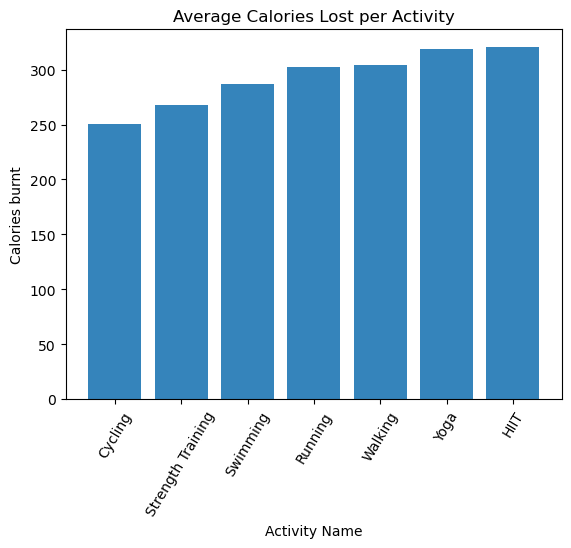

In [77]:
grouped = df.groupby('activity_type')['calories_burned'].mean().reset_index().sort_values(by ='calories_burned', ascending = 1)

y_pos = np.arange(len(grouped['calories_burned']))
plt.bar(y_pos, grouped['calories_burned'], alpha = 0.9)
plt.xticks(y_pos, grouped['activity_type'], rotation = 59)
plt.ylabel("Calories burnt")
plt.xlabel('Activity Name')
plt.title("Average Calories Lost per Activity")

plt.show()

In [102]:
day_group = df.groupby('day')['calories_burned'].mean().reset_index().sort_values(by ='calories_burned', ascending = 1 )
day_group

,day,calories_burned
5,Tuesday,258.250000
2,Saturday,271.400000
3,Sunday,273.045455
6,Wednesday,294.321429
1,Monday,318.346154
0,Friday,321.812500
4,Thursday,322.264706


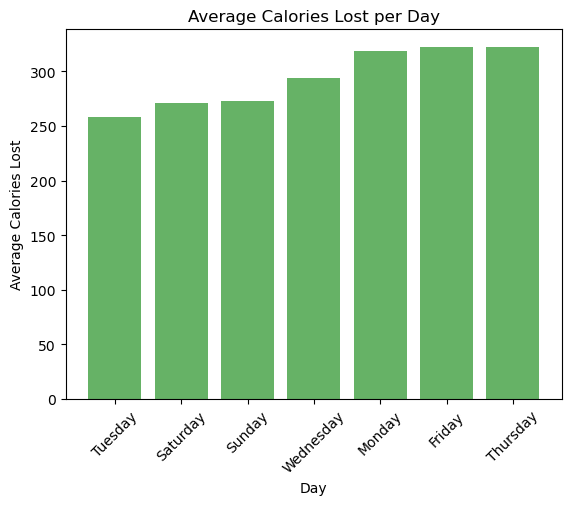

In [103]:
y_pos = np.arange(len(day_group))

#plot
plt.bar(y_pos, day_group['calories_burned'],color = 'green', alpha = 0.6)
plt.xticks(y_pos,day_group['day'], rotation = 45 )
plt.xlabel("Day")
plt.ylabel("Average Calories Lost")
plt.title("Average Calories Lost per Day")
plt.show()

In [85]:
season = df.groupby('season')['calories_burned'].mean().reset_index().sort_values(by = 'calories_burned', ascending=0)
season

,season,calories_burned
0,Autumn,305.538462
2,Summer,304.550459
1,Spring,258.179487


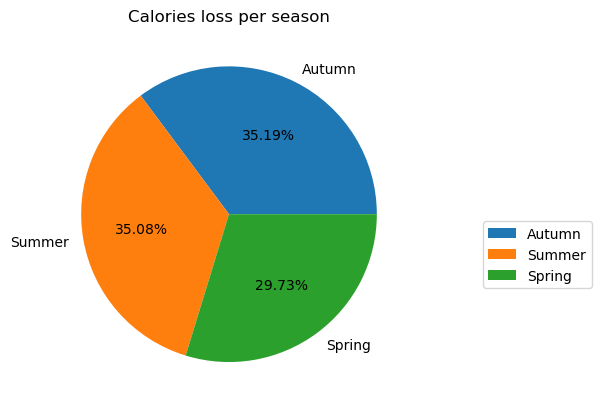

In [152]:
plt.pie(
    season['calories_burned'],
    labels = season['season'],
    autopct = '%1.2f%%',
    startangle = 0,
    shadow = 0
)

plt.legend(loc = 'upper right', bbox_to_anchor = (1.5,0.5))
plt.title('Calories loss per season')
plt.show()

In [117]:
gen_grouped = df.groupby('Generation')['steps'].mean().reset_index().sort_values(by = 'steps', ascending = 0)
gen_grouped

,Generation,steps
1,Generation X,15687.961538
3,Millennials (Gen Y),14060.106061
0,Baby Boomers,13151.783784
2,Generation Z,12776.081081


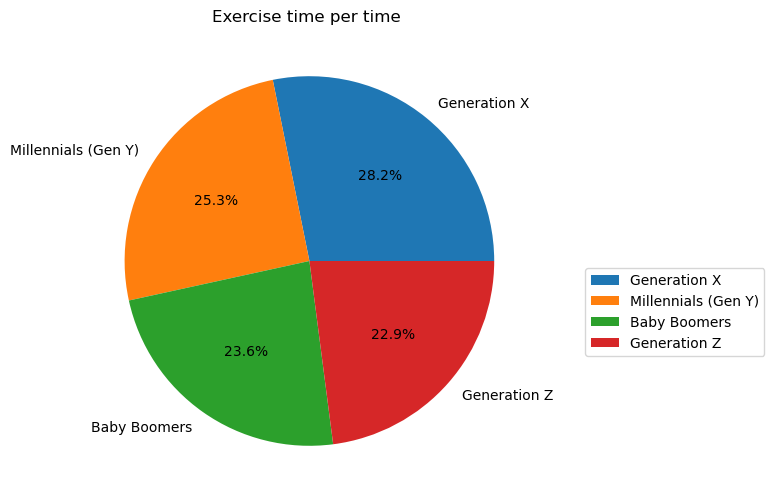

In [153]:
plt.figure(figsize=(6,6))
plt.pie(
    gen_grouped['steps'],
    labels = gen_grouped['Generation'],
    startangle = 0,
    autopct = '%1.1f%%'
)
plt.legend(loc = 'upper right', bbox_to_anchor = (1.5,0.5))

plt.title("Exercise time per time ")
plt.show()

In [129]:
hour_df = df.groupby('hour')['calories_burned'].mean().reset_index().sort_values(by = 'hour', ascending = 1)
hour_df

,hour,calories_burned
0,0,296.000000
1,1,299.833333
2,2,296.500000
3,3,292.100000
4,4,293.250000
5,5,226.250000
6,6,302.444444
7,7,294.428571
8,8,284.200000
9,9,308.500000


Text(0, 0.5, 'Average calories lost')

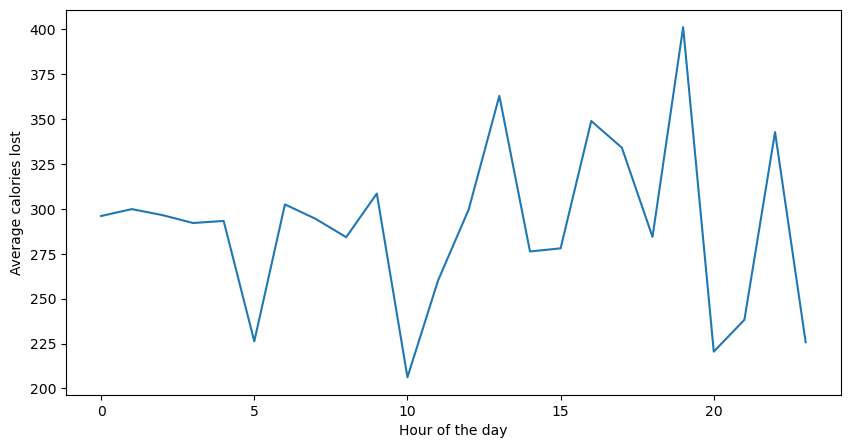

In [134]:
plt.figure(figsize = (10,5))

plt.plot(
    hour_df['hour'], 
    hour_df['calories_burned']
)
plt.xlabel('Hour of the day')
plt.ylabel('Average calories lost')

In [158]:
scatter_df = df.groupby('activity_type')[['duration_min', 'calories_burned']].mean().reset_index()
scatter_df

,activity_type,duration_min,calories_burned
0,Cycling,58.782609,250.478261
1,HIIT,60.481481,320.629630
2,Running,64.583333,302.833333
3,Strength Training,64.370370,267.444444
4,Swimming,71.888889,286.925926
5,Walking,59.700000,304.033333
6,Yoga,66.666667,318.523810


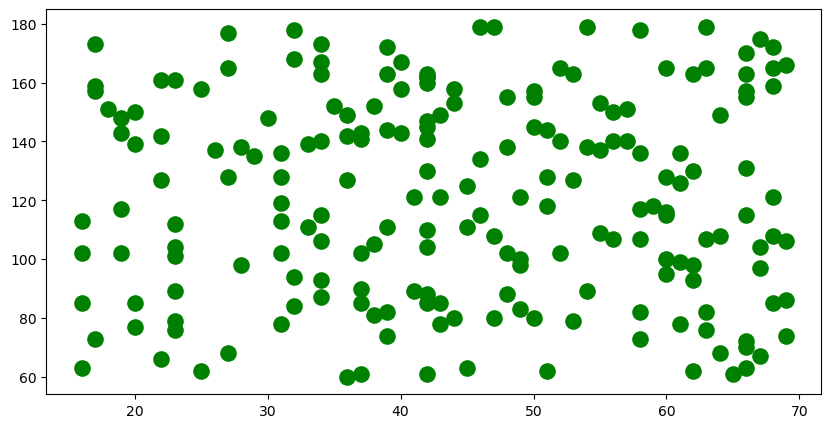

In [170]:
plt.figure(figsize = (10, 5))
plt.scatter(
    df['age'],
    df['heart_rate_avg'],
    color = 'green',
    s = 120

    
)
plt.show()

In [171]:
df.head()

,Unnamed: 0,record_id,timestamp,user_id,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,...,time_stamp,date,month,day,hour,season,week_time,year,born,Generation
0,0,1,2025-07-22 09:22:54,U026,67,Male,Cycling,7,322,175,...,2025-07-22 09:22:54,2025-07-22,July,Tuesday,9,Summer,weekday,2025,1958,Baby Boomers
1,1,2,2025-05-28 13:53:54,U039,16,Female,Strength Training,83,265,113,...,2025-05-28 13:53:54,2025-05-28,May,Wednesday,13,Spring,weekday,2025,2009,Generation Z
2,2,3,2025-08-07 01:36:54,U046,62,Female,Cycling,118,508,98,...,2025-08-07 01:36:54,2025-08-07,August,Thursday,1,Summer,weekday,2025,1963,Baby Boomers
3,3,4,2025-07-17 01:56:54,U048,56,Female,Swimming,75,270,150,...,2025-07-17 01:56:54,2025-07-17,July,Thursday,1,Summer,weekday,2025,1969,Generation X
4,4,5,2025-08-11 03:22:54,U042,42,Other,Yoga,76,308,141,...,2025-08-11 03:22:54,2025-08-11,August,Monday,3,Summer,weekday,2025,1983,Millennials (Gen Y)


In [176]:
df.rename(columns = {'activity_type':'Activity', 'gender':'Gender', 'age':'Age'}).head()

,Unnamed: 0,record_id,timestamp,user_id,Age,Gender,Activity,duration_min,calories_burned,heart_rate_avg,...,time_stamp,date,month,day,hour,season,week_time,year,born,Generation
0,0,1,2025-07-22 09:22:54,U026,67,Male,Cycling,7,322,175,...,2025-07-22 09:22:54,2025-07-22,July,Tuesday,9,Summer,weekday,2025,1958,Baby Boomers
1,1,2,2025-05-28 13:53:54,U039,16,Female,Strength Training,83,265,113,...,2025-05-28 13:53:54,2025-05-28,May,Wednesday,13,Spring,weekday,2025,2009,Generation Z
2,2,3,2025-08-07 01:36:54,U046,62,Female,Cycling,118,508,98,...,2025-08-07 01:36:54,2025-08-07,August,Thursday,1,Summer,weekday,2025,1963,Baby Boomers
3,3,4,2025-07-17 01:56:54,U048,56,Female,Swimming,75,270,150,...,2025-07-17 01:56:54,2025-07-17,July,Thursday,1,Summer,weekday,2025,1969,Generation X
4,4,5,2025-08-11 03:22:54,U042,42,Other,Yoga,76,308,141,...,2025-08-11 03:22:54,2025-08-11,August,Monday,3,Summer,weekday,2025,1983,Millennials (Gen Y)


In [180]:
df.iloc[1:10]

,Unnamed: 0,record_id,timestamp,user_id,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,...,time_stamp,date,month,day,hour,season,week_time,year,born,Generation
1,1,2,2025-05-28 13:53:54,U039,16,Female,Strength Training,83,265,113,...,2025-05-28 13:53:54,2025-05-28,May,Wednesday,13,Spring,weekday,2025,2009,Generation Z
2,2,3,2025-08-07 01:36:54,U046,62,Female,Cycling,118,508,98,...,2025-08-07 01:36:54,2025-08-07,August,Thursday,1,Summer,weekday,2025,1963,Baby Boomers
3,3,4,2025-07-17 01:56:54,U048,56,Female,Swimming,75,270,150,...,2025-07-17 01:56:54,2025-07-17,July,Thursday,1,Summer,weekday,2025,1969,Generation X
4,4,5,2025-08-11 03:22:54,U042,42,Other,Yoga,76,308,141,...,2025-08-11 03:22:54,2025-08-11,August,Monday,3,Summer,weekday,2025,1983,Millennials (Gen Y)
5,5,6,2025-07-25 13:00:54,U005,39,Female,HIIT,50,471,163,...,2025-07-25 13:00:54,2025-07-25,July,Friday,13,Summer,weekday,2025,1986,Millennials (Gen Y)
6,6,7,2025-05-21 08:47:54,U030,61,Other,Walking,88,238,78,...,2025-05-21 08:47:54,2025-05-21,May,Wednesday,8,Spring,weekday,2025,1964,NaN
7,7,8,2025-06-28 14:29:54,U014,46,Female,Yoga,39,133,179,...,2025-06-28 14:29:54,2025-06-28,June,Saturday,14,Summer,weekend,2025,1979,Generation X
8,8,9,2025-08-02 19:57:54,U036,63,Male,Swimming,10,500,82,...,2025-08-02 19:57:54,2025-08-02,August,Saturday,19,Summer,weekend,2025,1962,Baby Boomers
9,9,10,2025-08-31 09:54:54,U019,27,Other,Swimming,100,210,165,...,2025-08-31 09:54:54,2025-08-31,August,Sunday,9,Summer,weekend,2025,1998,Generation Z


In [179]:
df.loc[1:7]

,Unnamed: 0,record_id,timestamp,user_id,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,...,time_stamp,date,month,day,hour,season,week_time,year,born,Generation
1,1,2,2025-05-28 13:53:54,U039,16,Female,Strength Training,83,265,113,...,2025-05-28 13:53:54,2025-05-28,May,Wednesday,13,Spring,weekday,2025,2009,Generation Z
2,2,3,2025-08-07 01:36:54,U046,62,Female,Cycling,118,508,98,...,2025-08-07 01:36:54,2025-08-07,August,Thursday,1,Summer,weekday,2025,1963,Baby Boomers
3,3,4,2025-07-17 01:56:54,U048,56,Female,Swimming,75,270,150,...,2025-07-17 01:56:54,2025-07-17,July,Thursday,1,Summer,weekday,2025,1969,Generation X
4,4,5,2025-08-11 03:22:54,U042,42,Other,Yoga,76,308,141,...,2025-08-11 03:22:54,2025-08-11,August,Monday,3,Summer,weekday,2025,1983,Millennials (Gen Y)
5,5,6,2025-07-25 13:00:54,U005,39,Female,HIIT,50,471,163,...,2025-07-25 13:00:54,2025-07-25,July,Friday,13,Summer,weekday,2025,1986,Millennials (Gen Y)
6,6,7,2025-05-21 08:47:54,U030,61,Other,Walking,88,238,78,...,2025-05-21 08:47:54,2025-05-21,May,Wednesday,8,Spring,weekday,2025,1964,NaN
7,7,8,2025-06-28 14:29:54,U014,46,Female,Yoga,39,133,179,...,2025-06-28 14:29:54,2025-06-28,June,Saturday,14,Summer,weekend,2025,1979,Generation X


In [181]:
df.rename(columns = {'born':'Birth Date'})

,Unnamed: 0,record_id,timestamp,user_id,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,...,time_stamp,date,month,day,hour,season,week_time,year,Birth Date,Generation
0,0,1,2025-07-22 09:22:54,U026,67,Male,Cycling,7,322,175,...,2025-07-22 09:22:54,2025-07-22,July,Tuesday,9,Summer,weekday,2025,1958,Baby Boomers
1,1,2,2025-05-28 13:53:54,U039,16,Female,Strength Training,83,265,113,...,2025-05-28 13:53:54,2025-05-28,May,Wednesday,13,Spring,weekday,2025,2009,Generation Z
2,2,3,2025-08-07 01:36:54,U046,62,Female,Cycling,118,508,98,...,2025-08-07 01:36:54,2025-08-07,August,Thursday,1,Summer,weekday,2025,1963,Baby Boomers
3,3,4,2025-07-17 01:56:54,U048,56,Female,Swimming,75,270,150,...,2025-07-17 01:56:54,2025-07-17,July,Thursday,1,Summer,weekday,2025,1969,Generation X
4,4,5,2025-08-11 03:22:54,U042,42,Other,Yoga,76,308,141,...,2025-08-11 03:22:54,2025-08-11,August,Monday,3,Summer,weekday,2025,1983,Millennials (Gen Y)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,196,2025-05-28 13:00:54,U011,62,Female,Yoga,84,435,130,...,2025-05-28 13:00:54,2025-05-28,May,Wednesday,13,Spring,weekday,2025,1963,Baby Boomers
196,196,197,2025-10-10 22:31:54,U045,17,Male,Yoga,65,408,73,...,2025-10-10 22:31:54,2025-10-10,October,Friday,22,Autumn,weekday,2025,2008,Generation Z
197,197,198,2025-06-12 04:53:54,U021,41,Other,Strength Training,99,585,89,...,2025-06-12 04:53:54,2025-06-12,June,Thursday,4,Summer,weekday,2025,1984,Millennials (Gen Y)
198,198,199,2025-10-11 21:37:54,U009,66,Other,Yoga,74,230,72,...,2025-10-11 21:37:54,2025-10-11,October,Saturday,21,Autumn,weekend,2025,1959,Baby Boomers


In [183]:
df['age'] = df['age'].apply(pd.to_numeric)

In [185]:
df['age'] = df['age'].astype('float')

In [186]:
df['age']

0      67.0
1      16.0
2      62.0
3      56.0
4      42.0
       ... 
195    62.0
196    17.0
197    41.0
198    66.0
199    44.0
Name: age, Length: 200, dtype: float64

In [187]:
df

,Unnamed: 0,record_id,timestamp,user_id,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,...,time_stamp,date,month,day,hour,season,week_time,year,born,Generation
0,0,1,2025-07-22 09:22:54,U026,67.0,Male,Cycling,7,322,175,...,2025-07-22 09:22:54,2025-07-22,July,Tuesday,9,Summer,weekday,2025,1958,Baby Boomers
1,1,2,2025-05-28 13:53:54,U039,16.0,Female,Strength Training,83,265,113,...,2025-05-28 13:53:54,2025-05-28,May,Wednesday,13,Spring,weekday,2025,2009,Generation Z
2,2,3,2025-08-07 01:36:54,U046,62.0,Female,Cycling,118,508,98,...,2025-08-07 01:36:54,2025-08-07,August,Thursday,1,Summer,weekday,2025,1963,Baby Boomers
3,3,4,2025-07-17 01:56:54,U048,56.0,Female,Swimming,75,270,150,...,2025-07-17 01:56:54,2025-07-17,July,Thursday,1,Summer,weekday,2025,1969,Generation X
4,4,5,2025-08-11 03:22:54,U042,42.0,Other,Yoga,76,308,141,...,2025-08-11 03:22:54,2025-08-11,August,Monday,3,Summer,weekday,2025,1983,Millennials (Gen Y)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,196,2025-05-28 13:00:54,U011,62.0,Female,Yoga,84,435,130,...,2025-05-28 13:00:54,2025-05-28,May,Wednesday,13,Spring,weekday,2025,1963,Baby Boomers
196,196,197,2025-10-10 22:31:54,U045,17.0,Male,Yoga,65,408,73,...,2025-10-10 22:31:54,2025-10-10,October,Friday,22,Autumn,weekday,2025,2008,Generation Z
197,197,198,2025-06-12 04:53:54,U021,41.0,Other,Strength Training,99,585,89,...,2025-06-12 04:53:54,2025-06-12,June,Thursday,4,Summer,weekday,2025,1984,Millennials (Gen Y)
198,198,199,2025-10-11 21:37:54,U009,66.0,Other,Yoga,74,230,72,...,2025-10-11 21:37:54,2025-10-11,October,Saturday,21,Autumn,weekend,2025,1959,Baby Boomers


(array([0.01603774, 0.01320755, 0.01320755, 0.02358491, 0.0254717 ,
        0.01509434, 0.02075472, 0.01603774, 0.01981132, 0.0254717 ]),
 array([16. , 21.3, 26.6, 31.9, 37.2, 42.5, 47.8, 53.1, 58.4, 63.7, 69. ]),
 <BarContainer object of 10 artists>)

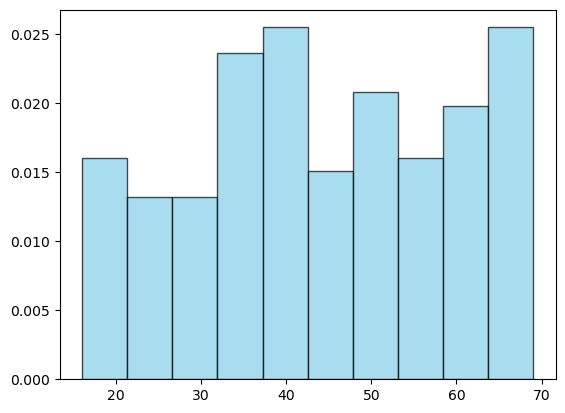

In [193]:
plt.hist(
    df['age'],
    color = 'skyblue',
    bins = 10,
    alpha = 0.7,
    edgecolor = 'black',
    density = 1
    
)

In [326]:
import seaborn as sns
sns.set_style('whitegrid')

Text(0.5, 0, 'Age')

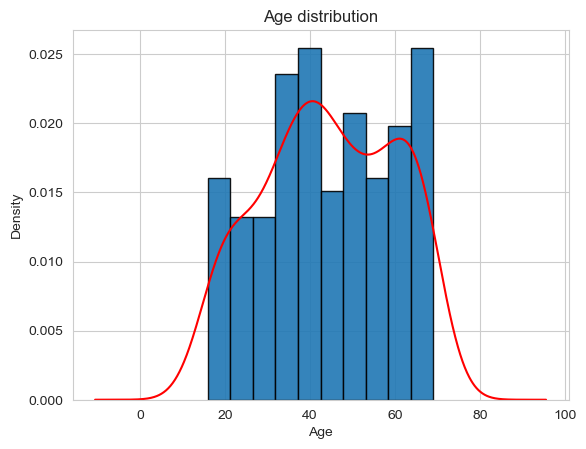

In [231]:
df['age'].plot(kind = 'hist', alpha = 0.9,bins = 10, edgecolor = 'black', density = 1)
df['age'].plot(kind = 'kde', color = 'red')
plt.title("Age distribution")
plt.xlabel('Age')

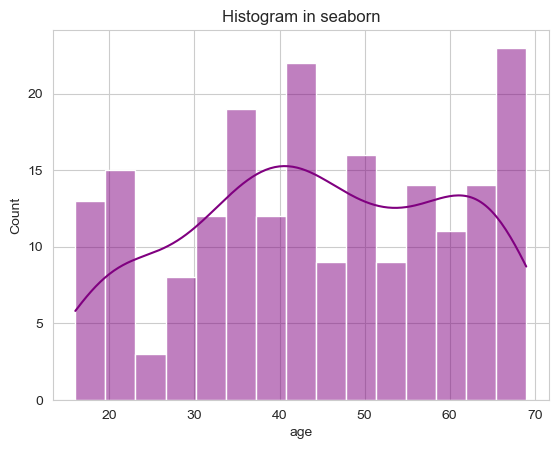

In [232]:
sns.histplot(
    data = df,
    x = 'age',
    bins = 15,
    kde = 1,
    color = 'purple'
)
plt.title("Histogram in seaborn")
plt.show()

Text(0, 0.5, 'Count')

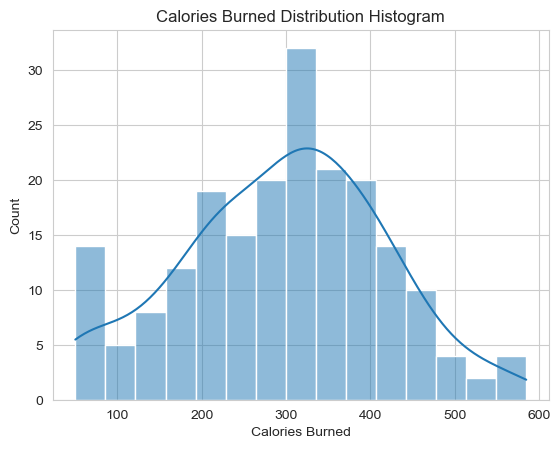

In [233]:
sns.histplot(
    data = df, 
    x = 'calories_burned',
    bins = 15,
    kde = 1
)

plt.title("Calories Burned Distribution Histogram")
plt.xlabel("Calories Burned")
plt.ylabel("Count")

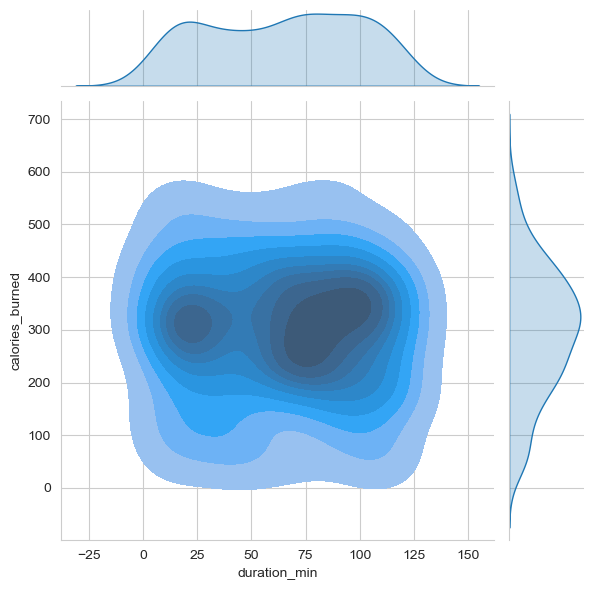

In [244]:
sns.jointplot(data = df, y = 'calories_burned', x = 'duration_min', kind = 'kde', fill = 1)

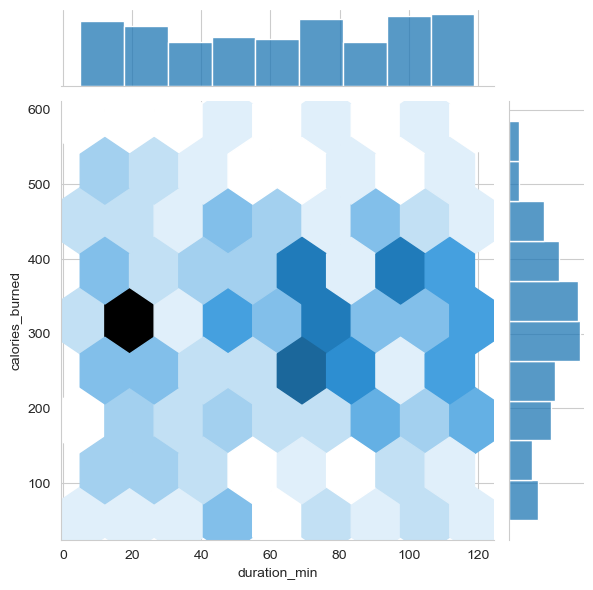

In [240]:
sns.jointplot(data = df, x = 'duration_min', y = 'calories_burned', kind = 'hex')

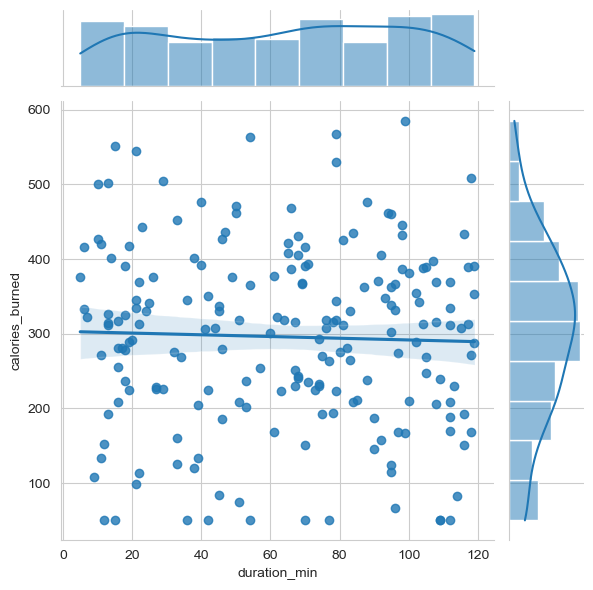

In [242]:
sns.jointplot(data = df, x = 'duration_min', y = 'calories_burned', kind = 'reg')

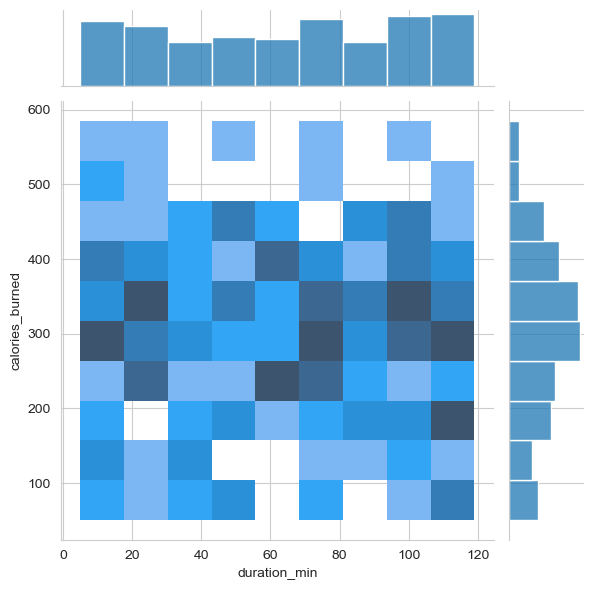

In [245]:
sns.jointplot(data = df, x = 'duration_min', y = 'calories_burned', kind = 'hist')

<Axes: ylabel='age'>

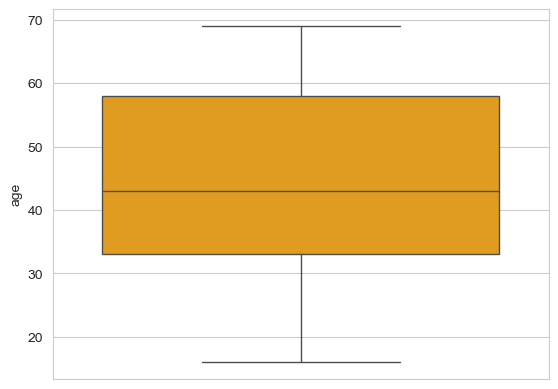

In [292]:
sns.boxplot(data = df , y = 'age', color = 'orange')

<Axes: xlabel='season', ylabel='calories_burned'>

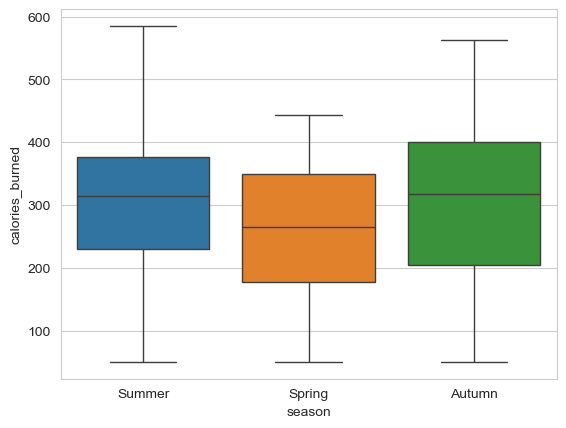

In [288]:
sns.boxplot(
    data = df,
    x = 'season',
    y = 'calories_burned',
    hue = 'season'
)

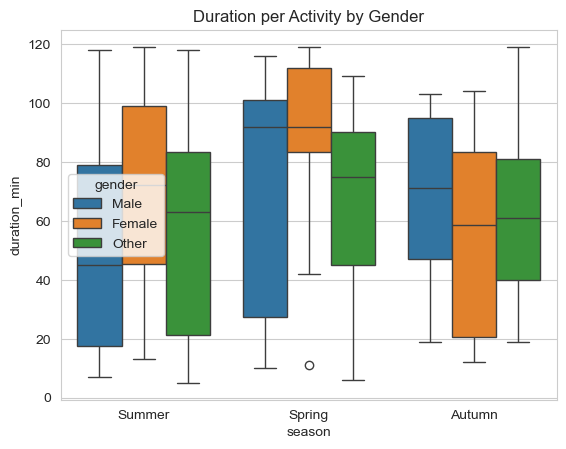

In [287]:
sns.boxplot(data=df, x='season', y='duration_min', hue='gender')
plt.title("Duration per Activity by Gender")
plt.show()


<Axes: xlabel='season', ylabel='calories_burned'>

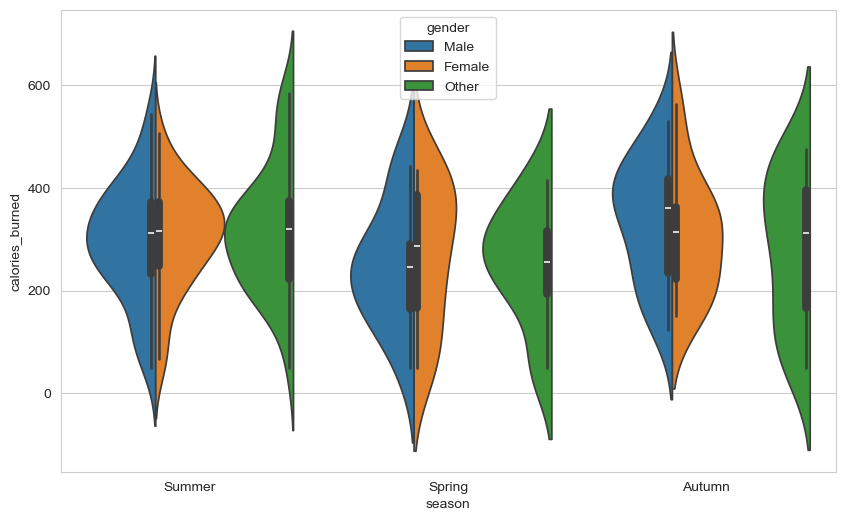

In [286]:
plt.figure(figsize = (10, 6))
sns.violinplot(data = df, y = 'calories_burned', x = 'season', hue = 'gender', split = 1)

Text(0.5, 0.98, 'Calories Burned Per Activity')

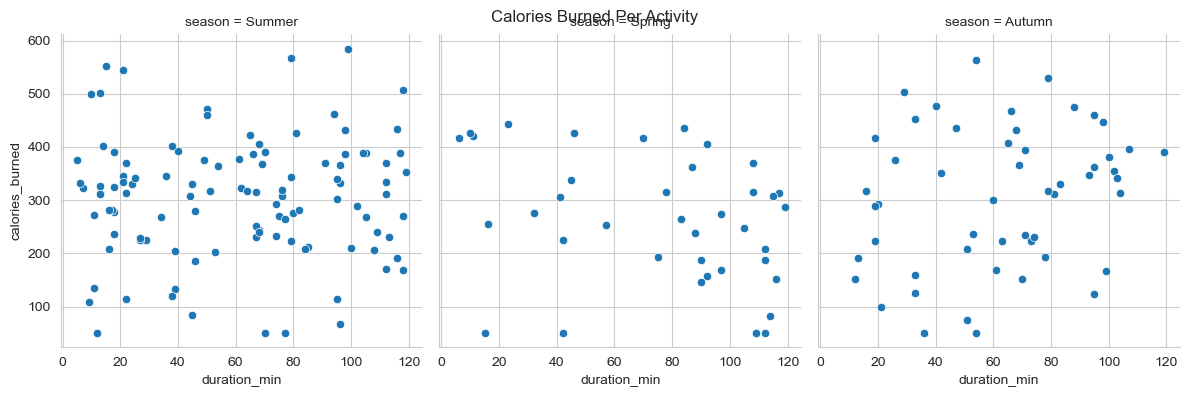

In [285]:
g = sns.FacetGrid(
    df, 
    col='season', 
    col_wrap = 3, 
    height = 4
)
g.map(
    sns.scatterplot, 
    'duration_min', 
    'calories_burned', 
    y = 3
)
g.fig.suptitle("Calories Burned Per Activity")

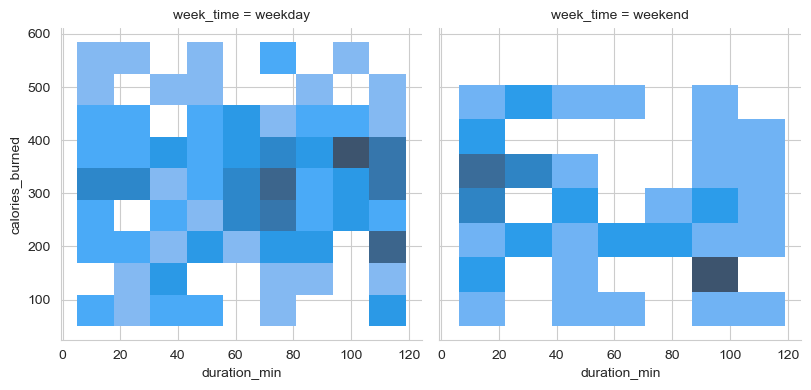

In [294]:
g = sns.FacetGrid(
    df,
    col = 'week_time',
    col_wrap = 3,
    height = 4
)

g.map(sns.histplot, 'duration_min', 'calories_burned')

In [295]:
!pip install plotly

In [296]:
import plotly.express as px

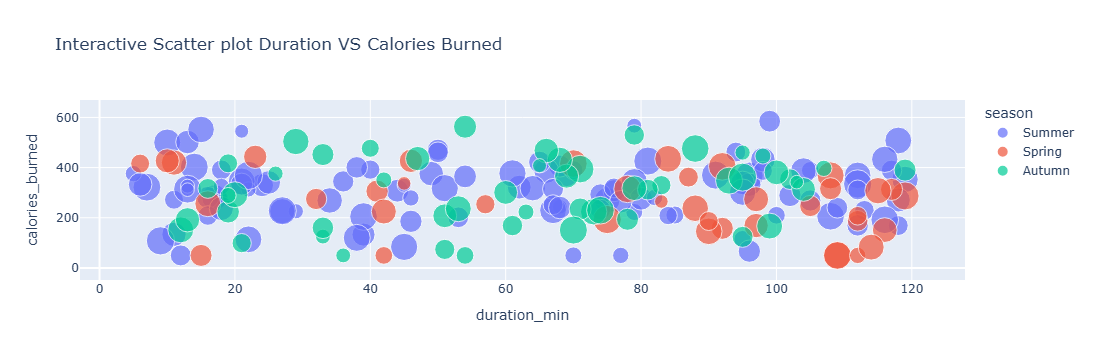

In [304]:
fig = px.scatter(
    df,
    x = 'duration_min',
    y = 'calories_burned',
    color = 'season',
    size = 'age',
    title = 'Interactive Scatter plot Duration VS Calories Burned',
    hover_data = ['day']
)
fig.show()

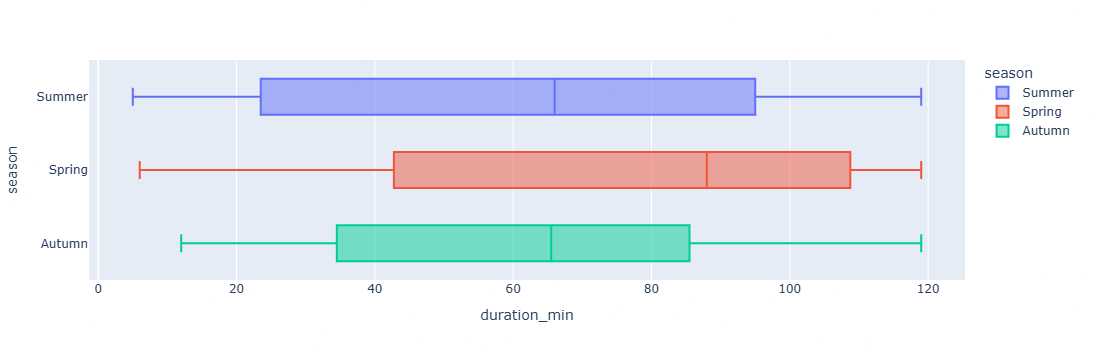

In [311]:
fig = px.box(
    df,
    x='duration_min',
    y = 'season',
    color = 'season', 
)
fig.show()

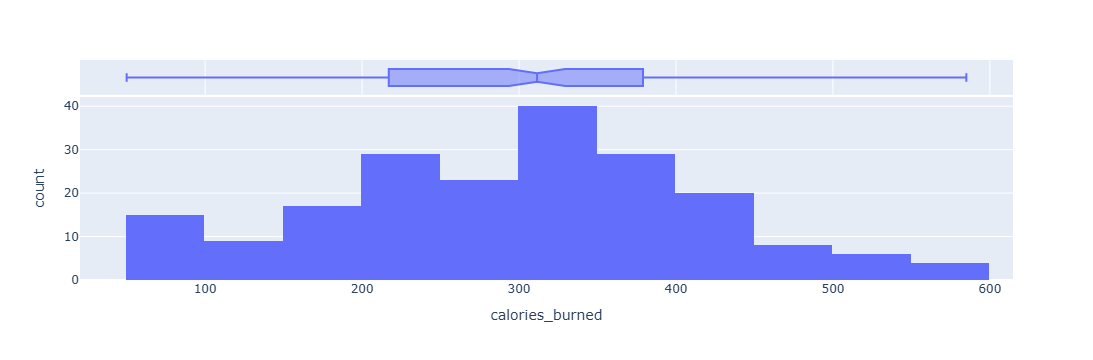

In [318]:
fig = px.histogram(
    df,
    x = 'calories_burned',
    nbins = 20,
    marginal = 'box'
)

fig.show()

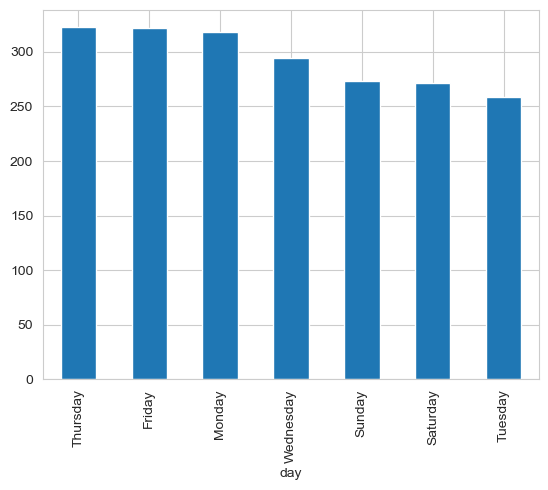

In [323]:
grouped = df.groupby('day')['calories_burned'].mean().sort_values(ascending = 0).plot(kind = 'bar')

In [319]:
df

,Unnamed: 0,record_id,timestamp,user_id,age,gender,activity_type,duration_min,calories_burned,heart_rate_avg,...,time_stamp,date,month,day,hour,season,week_time,year,born,Generation
0,0,1,2025-07-22 09:22:54,U026,67.0,Male,Cycling,7,322,175,...,2025-07-22 09:22:54,2025-07-22,July,Tuesday,9,Summer,weekday,2025,1958,Baby Boomers
1,1,2,2025-05-28 13:53:54,U039,16.0,Female,Strength Training,83,265,113,...,2025-05-28 13:53:54,2025-05-28,May,Wednesday,13,Spring,weekday,2025,2009,Generation Z
2,2,3,2025-08-07 01:36:54,U046,62.0,Female,Cycling,118,508,98,...,2025-08-07 01:36:54,2025-08-07,August,Thursday,1,Summer,weekday,2025,1963,Baby Boomers
3,3,4,2025-07-17 01:56:54,U048,56.0,Female,Swimming,75,270,150,...,2025-07-17 01:56:54,2025-07-17,July,Thursday,1,Summer,weekday,2025,1969,Generation X
4,4,5,2025-08-11 03:22:54,U042,42.0,Other,Yoga,76,308,141,...,2025-08-11 03:22:54,2025-08-11,August,Monday,3,Summer,weekday,2025,1983,Millennials (Gen Y)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,196,2025-05-28 13:00:54,U011,62.0,Female,Yoga,84,435,130,...,2025-05-28 13:00:54,2025-05-28,May,Wednesday,13,Spring,weekday,2025,1963,Baby Boomers
196,196,197,2025-10-10 22:31:54,U045,17.0,Male,Yoga,65,408,73,...,2025-10-10 22:31:54,2025-10-10,October,Friday,22,Autumn,weekday,2025,2008,Generation Z
197,197,198,2025-06-12 04:53:54,U021,41.0,Other,Strength Training,99,585,89,...,2025-06-12 04:53:54,2025-06-12,June,Thursday,4,Summer,weekday,2025,1984,Millennials (Gen Y)
198,198,199,2025-10-11 21:37:54,U009,66.0,Other,Yoga,74,230,72,...,2025-10-11 21:37:54,2025-10-11,October,Saturday,21,Autumn,weekend,2025,1959,Baby Boomers


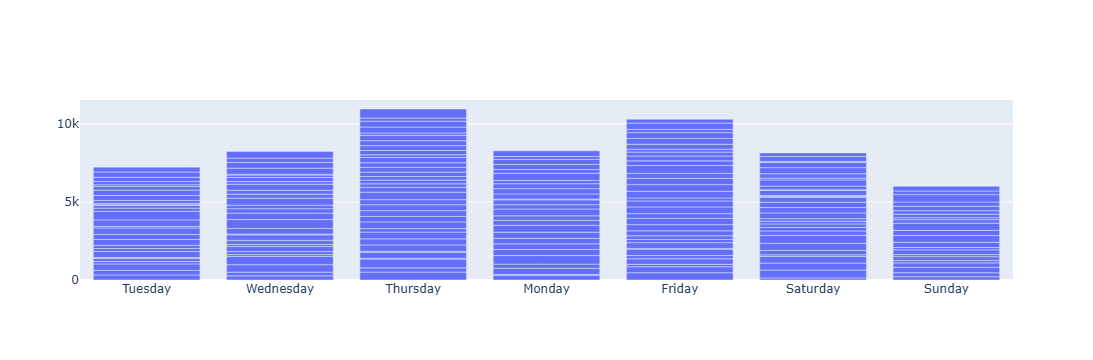

In [339]:
fig = go.Figure()
fig.add_trace(go.Bar(x = df['day'], y = df['calories_burned']))
fig.show()

In [346]:
!pip install ipywidgets
from ipywidgets import interact, interactive, fixed, widgets

In [351]:
def x(f):
    return x+2

interact(x, f = (0, 10))    

interactive(children=(IntSlider(value=5, description='f', max=10), Output()), _dom_classes=('widget-interact',…

<function __main__.x(f)>

In [352]:
import numpy as np

@interact(freq=(1, 10))
def plot_wave(freq=1):
    x = np.linspace(0, 10, 100)
    y = np.sin(freq * x)
    plt.plot(x, y)
    plt.title(f"Sine Wave (freq={freq})")
    plt.show()


interactive(children=(IntSlider(value=1, description='freq', max=10, min=1), Output()), _dom_classes=('widget-…